In [1]:
import codonbias as cb

In [4]:
enc = cb.scores.EffectiveNumberOfCodons()

/opt/conda/lib/python3.10/site-packages/codonbias/stats.py:78: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(Counter(
/opt/conda/lib/python3.10/site-packages/codonbias/stats.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(Counter(


In [6]:
from Bio.SeqIO import parse

In [18]:
fasta = parse('Escherichia_coli_str_k_12_substr_mg1655.ASM584v2.cds.all.fa', 'fasta')
genes = [str(record.seq) for record in fasta]

In [19]:
enc.get_score(genes)

array([52.61715029, 47.99120912, 50.08136827, ..., 43.45257418,
       54.84866431, 49.47678456])

In [19]:
cb.stats.CodonCounter(['AGA', 'AGG', 'ATA'], genetic_code=1, ignore_stop=False).get_aa_table().to_frame().query('count > 0')

count
aa codon       
I  ATA      1.0
R  AGA      1.0
   AGG      1.0

In [4]:
import json
import requests

In [5]:
def pretty_json(json_object): print(json.dumps(json_object, indent=2))

In [2]:
api_key = "9r50oMX4tBY8ZveScDpdl3EuPKLIjhkW"
api_endpoint = "https://api.core.ac.uk/v3/"

In [211]:
api_key = '779ce21274f7b869c03606bba2996e91'
api_endpoint = 'https://api.elsevier.com/content/article/doi/'
# api_endpoint = 'https://www.scopus.com/record/display.uri?eid=2-s2.0-84958606331&origin=inward&txGid=b141d8ebe64ecc1247cd468d7d1b0a24'

In [212]:
def get_entity(url_fragment):
    # headers={"Authorization":"Bearer "+api_key}
    headers = {"Accept": "application/json",
               "X-ELS-APIKey": api_key}
    response = requests.get(api_endpoint + url_fragment, headers=headers)
    if response.status_code == 200:
        return response.json(), response.elapsed.total_seconds()
    else:
        print(f"Error code {response.status_code}, {response.content}")

In [213]:
doi = '10.1038/nrg.2015.16'
results = get_entity(doi)[0]

Error code 404, b'{"service-error":{"status":{"statusCode":"RESOURCE_NOT_FOUND","statusText":"The resource specified cannot be found."}}}'


TypeError: 'NoneType' object is not subscriptable

In [242]:
res = requests.get(f'https://api.elsevier.com/content/abstract/doi/{doi}',
              headers={"X-ELS-APIKey": '0741684043fedcf59a04dbd6c26b30c5', "Accept": 'application/json'})

In [249]:
res.json()['abstracts-retrieval-response']['coredata']['link']

[{'@_fa': 'true',
  '@rel': 'self',
  '@href': 'https://api.elsevier.com/content/abstract/scopus_id/84958606331'},
 {'@_fa': 'true',
  '@rel': 'scopus',
  '@href': 'https://www.scopus.com/inward/record.uri?partnerID=HzOxMe3b&scp=84958606331&origin=inward'},
 {'@_fa': 'true',
  '@rel': 'scopus-citedby',
  '@href': 'https://www.scopus.com/inward/citedby.uri?partnerID=HzOxMe3b&scp=84958606331&origin=inward'}]

In [206]:
res.json()['abstracts-retrieval-response']['coredata']['link']

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

<!DOCTYPE html>
<html lang="en-US">
   <head>
      <title>Access denied</title>
      <meta http-equiv="X-UA-Compatible" content="IE=Edge" />
      <meta name="robots" content="noindex, nofollow" />
      <meta name="viewport" content="width=device-width,initial-scale=1" />
      <link rel="stylesheet" href="/cdn-cgi/styles/errors.css" media="screen" />
      <script>
(function(){if(document.addEventListener&&window.XMLHttpRequest&&JSON&&JSON.stringify){var e=function(a){var c=document.getElementById("error-feedback-survey"),d=document.getElementById("error-feedback-success"),b=new XMLHttpRequest;a={event:"feedback clicked",properties:{errorCode:1020,helpful:a,version:5}};b.open("POST","https://sparrow.cloudflare.com/api/v1/event");b.setRequestHeader("Content-Type","application/json");b.setRequestHeader("Sparrow-Source-Key","c771f0e4b54944bebf4261d44bd79a1e");
b.send(JSON.stringify(a));c.classList.add("feedback-hidden");d.classList.remove("feedback-hidden")};document.addEventListener(
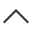

In [250]:
print(requests.get('https://www.scopus.com/inward/record.uri?partnerID=HzOxMe3b&scp=84958606331&origin=inward').text)

In [172]:
res.json()['abstracts-retrieval-response']['co']

KeyError: 'dc:description'

<!DOCTYPE html>
<html lang="en-US">
   <head>
      <title>Access denied</title>
      <meta http-equiv="X-UA-Compatible" content="IE=Edge" />
      <meta name="robots" content="noindex, nofollow" />
      <meta name="viewport" content="width=device-width,initial-scale=1" />
      <link rel="stylesheet" href="/cdn-cgi/styles/errors.css" media="screen" />
      <script>
(function(){if(document.addEventListener&&window.XMLHttpRequest&&JSON&&JSON.stringify){var e=function(a){var c=document.getElementById("error-feedback-survey"),d=document.getElementById("error-feedback-success"),b=new XMLHttpRequest;a={event:"feedback clicked",properties:{errorCode:1020,helpful:a,version:5}};b.open("POST","https://sparrow.cloudflare.com/api/v1/event");b.setRequestHeader("Content-Type","application/json");b.setRequestHeader("Sparrow-Source-Key","c771f0e4b54944bebf4261d44bd79a1e");
b.send(JSON.stringify(a));c.classList.add("feedback-hidden");d.classList.remove("feedback-hidden")};document.addEventListener(
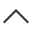

In [147]:
print(res.content.decode('utf-8'))

In [134]:
results['abstracts-retrieval-response']['coredata']

{'srctype': 'j',
 'eid': '2-s2.0-84922673767',
 'pubmed-id': '25510862',
 'prism:coverDate': '2014-01-01',
 'prism:aggregationType': 'Journal',
 'prism:url': 'https://api.elsevier.com/content/abstract/scopus_id/84922673767',
 'subtypeDescription': 'Article',
 'dc:creator': {'author': [{'ce:given-name': 'Alon',
    'preferred-name': {'ce:given-name': 'Alon',
     'ce:initials': 'A.',
     'ce:surname': 'Diament',
     'ce:indexed-name': 'Diament A.'},
    '@seq': '1',
    'ce:initials': 'A.',
    '@_fa': 'true',
    'affiliation': {'@id': '60005681',
     '@href': 'https://api.elsevier.com/content/affiliation/affiliation_id/60005681'},
    'ce:surname': 'Diament',
    '@auid': '56513643500',
    'author-url': 'https://api.elsevier.com/content/author/author_id/56513643500',
    'ce:indexed-name': 'Diament A.'}]},
 'link': [{'@_fa': 'true',
   '@rel': 'self',
   '@href': 'https://api.elsevier.com/content/abstract/scopus_id/84922673767'},
  {'@_fa': 'true',
   '@rel': 'scopus',
   '@href':

In [6]:
data_provider, elapsed = get_entity("data-providers/1")
pretty_json(data_provider)

{
  "id": 1,
  "openDoarId": 1767,
  "name": "Aberdeen University Research Archive",
  "email": "aura.deposit@abdn.ac.uk",
  "uri": null,
  "oaiPmhUrl": "https://aura.abdn.ac.uk/dspace-oai/request",
  "homepageUrl": "http://aura.abdn.ac.uk",
  "source": null,
  "software": "dspace",
  "metadataFormat": "oai_dc",
  "createdDate": "2011-05-05T23:00:00+00:00",
  "location": {
    "countryCode": "GB",
    "latitude": 57.165,
    "longitude": -2.0991
  },
  "logo": "https://api.core.ac.uk/data-providers/1/logo",
  "type": "REPOSITORY",
  "stats": null
}


In [105]:
def query_api(url_fragment, query,limit=100):
    headers={"Authorization":"Bearer "+api_key}
    query = {"q":query, "limit":limit}
    response = requests.post(f"{api_endpoint}{url_fragment}",data = json.dumps(query), headers=headers)
    if response.status_code ==200:
        return response.json(), response.elapsed.total_seconds()
    else:
        print(f"Error code {response.status_code}, {response.content}")

In [103]:
results , elapsed = query_api("search/works", "author:Diament")

In [87]:
list(results['results'][0])[20:30]

['oaiIds',
 'publishedDate',
 'publisher',
 'pubmedId',
 'references',
 'sourceFulltextUrls',
 'updatedDate',
 'yearPublished',
 'journals',
 'links']

In [104]:
[r for r in results['results'] if r['citationCount'] is not None]

[]